In [1]:
# Title: DMRG Ground State Search and Compression Algorithms
# Author: Aaron Sander
# Date: March-May 2020

# This program is used for initial learning of tensor network methods
# to be used in my bachelor thesis.
# It is an implementation of the Density Matrix Renormalization Group (DMRG)
# for the ground state search of a given Hamiltonian as an MPO as well as
# for compressing an arbitrary quantum state which has relevant applications
# in data compression and graph embedding.

### NOTE: This code is written for learning purposes. It is not meant
###       to be optimized for speed/efficiency, but has readability in mind.

In [2]:
######################### IMPORTS #############################################
from canonical_forms import *
from compression import *
from contractions import *
import initializations as init
from metrics import *
import machine_learning as ML
import activation_functions as act

import ground_state_search as gnd

import numpy as np
import math

# Ground State Search
This section looks for the ground state of the Ising Model with given parameters as accurately as a given threshold.

In [6]:
MPO = init.initialize_quantum_ising_MPO(num_sites=200, J=1, g=1)

Initial Energy: -199.79396773633354
Energy: -236.85472442056323 BondDim: 1
Energy: -249.31543260584772 BondDim: 1
Energy: -249.40134269581372 BondDim: 1
Energy: -249.40246928790825 BondDim: 1
Energy: -249.4024774247437 BondDim: 1
Energy: -253.96021519065513 BondDim: 2
Energy: -254.10680135016557 BondDim: 2
Energy: -254.1099024504079 BondDim: 2
Energy: -254.11002186422607 BondDim: 2
Energy: -254.16719241716052 BondDim: 3
Energy: -254.2219775954176 BondDim: 3
Energy: -254.2269837640664 BondDim: 3
Energy: -254.22710489327784 BondDim: 3
Energy: -254.26271477640813 BondDim: 4
Energy: -254.26692865751568 BondDim: 4
Energy: -254.26733619749575 BondDim: 4
Energy: -254.27100103827556 BondDim: 5
Energy: -254.27418533414667 BondDim: 5
Energy: -254.27562481663767 BondDim: 5
Energy: -254.275821643954 BondDim: 5
Energy: -254.27924256246035 BondDim: 6
Energy: -254.28124727387615 BondDim: 6
Energy: -254.28189115422387 BondDim: 6
Energy: -254.2831451094981 BondDim: 7
Energy: -254.28325695751772 BondDim

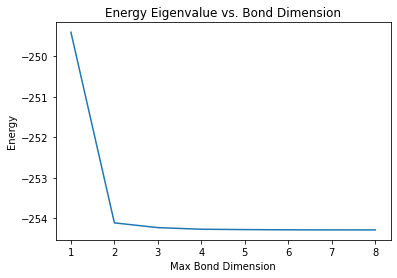

In [7]:
E, V, max_bond_dim = gnd.ground_state_search(MPO, threshold=1e-3, plot=1)

# Compression
This section converts an arbitrary n-bit string into an MPS and compresses it into one with a lower bond dimension.
The metrics used are cosine similarity (0 worst, 1 perfect), loss (1-cosSim), and Euclidean distance (-2 worst, 0 best)

In [3]:
data = init.initialize_random_normed_vector(length=1024)

In [4]:
d = 2
raw_state = vector_to_left_canonical_MPS(data, phys_dim=d, num_sites=int(math.log(len(data), d)))

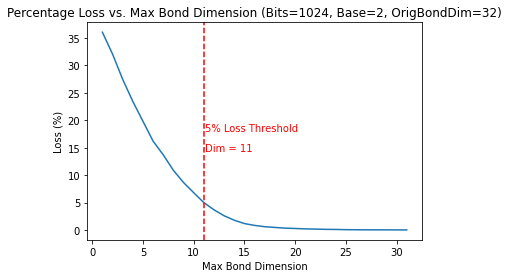

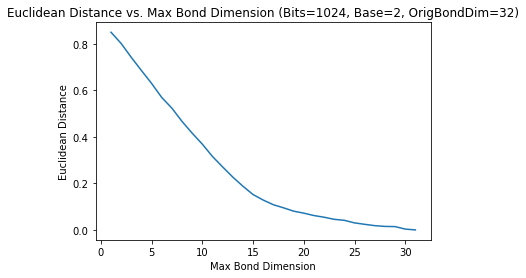

In [5]:
compressions, dist, sim = compress(raw_state, threshold=1e-3, plot=1)